In [85]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn import datasets, preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [86]:
#__IMPORTAMOS NUESTRO ARCHIVO CSV__Y LO CONVERTIMOS EN UN DATAFRAME__
df01=pd.read_csv(r"C:\Users\jesus\Documents\data scince\github\properatti.csv" ,delimiter=",")
pd.set_option('display.max_columns', None)
df01=df01.drop(["Unnamed: 0"], axis=1)

In [87]:
df01.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [88]:
# Borramos las columnas que no vamos a comparar con el otro proyecto
df=df01.drop(["property_type", "operation", "state_name", "geonames_id", "place_name", "country_name", "place_with_parent_names", "price", "lat-lon", "lat", "lon", "price_aprox_local_currency", "surface_total_in_m2", "price_per_m2", "currency", "image_thumbnail", "price_usd_per_m2", "description", "title", "properati_url", "expenses"], axis=1)

In [89]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
0,62000.0,40.0,NaN,NaN
1,150000.0,NaN,NaN,NaN
2,72000.0,55.0,NaN,NaN
3,95000.0,NaN,NaN,NaN
4,64000.0,35.0,NaN,NaN
...,...,...,...,...
121215,870000.0,93.0,NaN,NaN
121216,498000.0,360.0,NaN,NaN
121217,131500.0,39.0,NaN,NaN
121218,95900.0,48.0,NaN,NaN


In [90]:
#Eliminamos los nan para ver los datos que nos interesan
df = df.dropna(axis = 0)

In [91]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
89,50000.0,53.0,1.0,1.0
93,385000.0,416.0,2.0,3.0
94,135000.0,95.0,2.0,3.0
95,75000.0,180.0,1.0,1.0
96,54000.0,30.0,3.0,2.0
...,...,...,...,...
119929,75000.0,23.0,7.0,1.0
119930,170000.0,63.0,2.0,3.0
119935,95000.0,12731.0,1.0,10.0
119936,267000.0,82.0,1.0,4.0


In [92]:
# Hacemos un describe en el dataframe para ver localizar outlierts 
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.510000e+03,4510.000000,4510.000000,4510.000000
mean,2.281335e+05,110.444124,25.580931,2.662306
std,3.289798e+05,425.448592,148.305896,1.308373
min,5.047530e+03,5.000000,1.000000,1.000000
25%,8.580000e+04,42.000000,1.000000,2.000000
50%,1.300000e+05,60.000000,3.000000,3.000000
75%,2.174756e+05,100.000000,6.000000,3.000000
max,3.900000e+06,12731.000000,2509.000000,22.000000


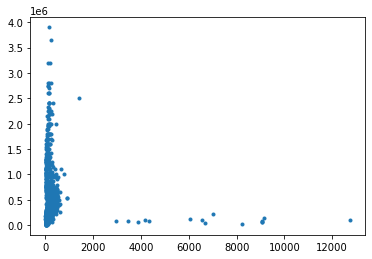

In [93]:
# Hacemos un grafico e identificamos que hay algunos outlierts
plt.plot(df["surface_covered_in_m2"],df["price_aprox_usd"], '.')

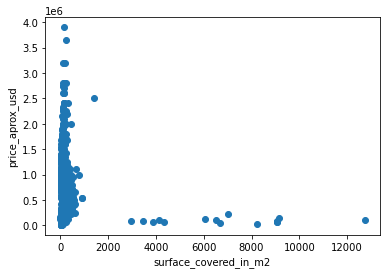

In [94]:
xs = df["surface_covered_in_m2"]
ys = df["price_aprox_usd"]

plt.scatter(xs, ys)
plt.xlabel("surface_covered_in_m2")
plt.ylabel("price_aprox_usd");

In [95]:
# procedemos a eliminar los outlierts, para que no nos afecte nuestra prediccion
# CON LA COLUMNA DE FLOOR MIRAMOS DATOS OULIERS Y LOS SUSTITUIMOS PARA QUE NO AFECTE LA MEDIA DE LA COLUMNA
df.loc[df['floor'].map(df['floor'].value_counts()) < 5] = 1
df['floor'].value_counts()


1.0     1391
2.0      947
3.0      474
4.0      335
5.0      276
6.0      263
7.0      197
8.0      134
9.0      120
10.0     101
11.0      66
12.0      63
13.0      37
14.0      28
15.0      19
17.0      17
16.0      12
22.0      11
18.0       9
25.0       5
19.0       5
Name: floor, dtype: int64

In [96]:
df.describe()

,price_aprox_usd,surface_covered_in_m2,floor,rooms
count,4.510000e+03,4510.000000,4510.000000,4510.000000
mean,2.174968e+05,105.615743,3.833925,2.556984
std,3.306068e+05,425.766742,3.560416,1.322381
min,1.000000e+00,1.000000,1.000000,1.000000
25%,8.000000e+04,40.000000,1.000000,2.000000
50%,1.250000e+05,58.000000,2.000000,2.000000
75%,2.019050e+05,95.000000,5.000000,3.000000
max,3.900000e+06,12731.000000,25.000000,22.000000


In [97]:
# SUSTITUIMOS LOS VALORES FALSOS
df.loc[df['surface_covered_in_m2'].map(df['surface_covered_in_m2'].value_counts()) < 15] 
df['surface_covered_in_m2'].value_counts()

1.0        223
40.0       146
45.0       132
50.0       104
38.0        90
          ... 
335.0        1
266.0        1
297.0        1
226.0        1
12731.0      1
Name: surface_covered_in_m2, Length: 313, dtype: int64

In [77]:
df

,price_aprox_usd,surface_covered_in_m2,floor,rooms
89,50000.0,53.0,1.0,1.0
93,2.0,2.0,2.0,2.0
94,2.0,2.0,2.0,2.0
95,75000.0,180.0,1.0,1.0
96,54000.0,30.0,3.0,2.0
...,...,...,...,...
119929,2.0,2.0,2.0,2.0
119930,170000.0,63.0,2.0,3.0
119935,2.0,2.0,2.0,2.0
119936,267000.0,82.0,1.0,4.0


In [83]:
df.loc[df['price_aprox_usd'].map(df['price_aprox_usd'].value_counts()) < 10000 ]  = 
df['price_aprox_usd'].value_counts()

1.0    4510
Name: price_aprox_usd, dtype: int64